# Sprawozdanie z laboratorium 6 - Kacper Barczyk - 18.05.2021

In [1]:
import mpmath as mp
from mpmath import sin
from mpmath import cos
from mpmath import sinh
from mpmath import cosh
from mpmath import tan
from mpmath import exp
from mpmath import mpf
from math import pi
from mpmath import sign
import colorsys
import matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
from math import ceil
from math import floor
from math import log
from numpy import float64
import random
import time
import scipy
from scipy.linalg import lu
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Zad 1

# Metoda Gaussa - Jordana

In [2]:
def gaussJordanMethod(matrix, vector): # funkcja modyfikuje zawartość przekazywanych tablic
    
    (n, _) = matrix.shape # rozmiar macierzy
    sysOfEq = np.hstack((matrix, vector)) # połączenie macierzy i wektora
    
    for i in range(n):
        for j in range(n):
            if j != i:
                div = sysOfEq[j, i] / sysOfEq[i, i]
                sysOfEq[j] = sysOfEq[j] - div * sysOfEq[i]
    
    # wpisanie przekształconej macierzy
    for i in range(n):
        for j in range(n):
            matrix[i][j] = sysOfEq[i][j]
    
    # wpisanie przekształconego wektora
    for i in range(n):
        vector[i][0] = sysOfEq[i][n]
    
    res = []
    
    for i in range(n):
        res.append([vector[i][0] / matrix[i][i]]) # zwracam wektor w takiej postaci, jak funkcja np.linalg.solve
        
    return np.array(res)

In [3]:
# funkcja gaussJordanMethod
matrix = np.random.rand(1000, 1000)
vector = np.random.rand(1000, 1)

start = time.process_time()
gaussJordanMethod(matrix, vector)
end = time.process_time()
print("Czas działania funkcji gaussJordanMethod wynosi:", end - start)

# funkcja np.linalg.solve
matrix = np.random.rand(1000, 1000)
vector = np.random.rand(1000, 1)

start = time.process_time()
np.linalg.solve(matrix, vector)
end = time.process_time()
print("Czas działania funkcji np.linalg.solve wynosi:", end - start)

Czas działania funkcji gaussJordanMethod wynosi: 5.46875
Czas działania funkcji np.linalg.solve wynosi: 0.015625


In [4]:
matrix = np.array([[1, 1], [1, -1]])
vector = np.array([[4], [2]])

print(np.linalg.solve(matrix, vector))
print(gaussJordanMethod(matrix, vector))

[[3.]
 [1.]]
[[3.]
 [1.]]


Zaletą metody Gaussa-Jordana w stosunku do metody Gaussa jest przejrzystość. Po przekształceniach macierzy otrzymujemy układ równań w postaci

$$a_1 x_1 = y_1$$
$$a_2 x_2 = y_2$$
$$...$$
$$a_n x_n = y_n$$

Więc bardzo łatwo obliczyć wektor niewiadomych. Metoda ma natomiast gorszą stałą złożoności obliczeniowej

# Zad 2

# 2.1 Faktoryzacja LU

In [5]:
def factorizationLU(matrix):
    
    (n, _) = matrix.shape # rozmiar macierzy
    
    U = [[0.0 for i in range(n)] for i in range(n)]
    U = np.array(U)
    
    L = [[0.0 for i in range(n)] for i in range(n)]
    for i in range(n):
        L[i][i] = 1.0
    L = np.array(L)
    
    for i in range(n):
        q = i
        
        for j in range(i, n):
            if abs(matrix[j, i]) > abs(matrix[q, i]):
                q = j
        
        matrix[i], matrix[q] = matrix[q].copy(), matrix[i].copy()
        
    for i in range(n):
        for j in range(i, n):
            acc = 0
            
            for k in range(i):
                acc += L[i, k] * U[k, j]
            
            U[i, j] = matrix[i, j] - acc
            # print(U)
            
        for j in range(i + 1, n):
            acc = 0
            
            for k in range(i):
                acc += L[j, k] * U[k, i]
            
            L[j, i] = ( matrix[j, i] - acc ) / U[i, i]
            # print(L)
                    
    L = np.array(L)
    U = np.array(U)
            
    return L, U

In [6]:
# testy

for i in range(3):
    
    matrix = np.random.rand(3, 3)
    print("Wygenerowana macierz")
    print(matrix, "\n")
    
    L, U = factorizationLU(matrix)
    print("Macierz po faktoryzacji LU i iloczynie LU (mogą występować zamiany wierszy)")
    print(L @ U)
    
    print("\n------------------------------------\n")

Wygenerowana macierz
[[0.55482771 0.62193567 0.57569238]
 [0.3231916  0.44540446 0.95556886]
 [0.98141873 0.95606432 0.06268828]] 

Macierz po faktoryzacji LU i iloczynie LU (mogą występować zamiany wierszy)
[[0.98141873 0.95606432 0.06268828]
 [0.55482771 0.62193567 0.57569238]
 [0.3231916  0.44540446 0.95556886]]

------------------------------------

Wygenerowana macierz
[[0.56521511 0.46222393 0.52951266]
 [0.55362235 0.40949664 0.24756317]
 [0.98388102 0.77479434 0.51637171]] 

Macierz po faktoryzacji LU i iloczynie LU (mogą występować zamiany wierszy)
[[0.98388102 0.77479434 0.51637171]
 [0.56521511 0.46222393 0.52951266]
 [0.55362235 0.40949664 0.24756317]]

------------------------------------

Wygenerowana macierz
[[0.74064227 0.77952967 0.95074237]
 [0.45230147 0.72130963 0.56236936]
 [0.68626758 0.82370782 0.60221413]] 

Macierz po faktoryzacji LU i iloczynie LU (mogą występować zamiany wierszy)
[[0.74064227 0.77952967 0.95074237]
 [0.68626758 0.82370782 0.60221413]
 [0.4523

# 2.2

Faktoryzacja LU w rozwiązywaniu układów równań:

$$A*x = y$$
$$L * U = A$$
$$L*U*x = y$$

gdzie,
A - macierz współczynników;
x - vektor niewiadomych;
y = wektor wyrazów wolnych;
L - macierz trójkątna dolna;
U - macierz trójkątna górna

Należy rozwiązać dwa równania:
$$L * z = y$$
$$U * x = z$$

Do rozwiązania układu równań przy pomocy faktoryzacji LU użyję redundantnej funkcji factorizationLUForSolvingEquation,
która oprócz macierzy przyjmuje również wektor niewiadomych, i w przypadku gdy pivoting zamienia wiersze macierzy wspólczynników, funkcja zamieni również wiersze w wektorze wyrazów wolnych.

In [7]:
def factorizationLUForSolvingEquation(matrix, vector):
    
    (n, _) = matrix.shape # rozmiar macierzy
    
    U = [[0.0 for i in range(n)] for i in range(n)]
    U = np.array(U)
    
    L = [[0.0 for i in range(n)] for i in range(n)]
    for i in range(n):
        L[i][i] = 1.0
    L = np.array(L)
    
    for i in range(n):
        q = i
        
        for j in range(i, n):
            if abs(matrix[j, i]) > abs(matrix[q, i]):
                q = j
        
        matrix[i], matrix[q] = matrix[q].copy(), matrix[i].copy()
        vector[i], vector[q] = vector[q].copy(), vector[i].copy()
        
    for i in range(n):
        for j in range(i, n):
            acc = 0
            
            for k in range(i):
                acc += L[i, k] * U[k, j]
            
            U[i, j] = matrix[i, j] - acc
            # print(U)
            
        for j in range(i + 1, n):
            acc = 0
            
            for k in range(i):
                acc += L[j, k] * U[k, i]
            
            L[j, i] = ( matrix[j, i] - acc ) / U[i, i]
            # print(L)
                    
    L = np.array(L)
    U = np.array(U)
            
    return L, U

# Przykładowe rozwiązanie układu równań, przy pomocy LU

In [8]:
matrix = np.array([[3, 3, 2], [5, 2, 1], [1, 1, -1]])
vector = np.array([[19], [17], [-2]])

print("Rozwiązanie układu metodą np.linalg.solve")
print(np.linalg.solve(matrix, vector))

# zbudowanie macierzy L i U i ew. zamiana wierszy wektora niewiadomych (skutek pivotingu)
L, U = factorizationLUForSolvingEquation(matrix, vector)

# znalezienie z
z = np.linalg.solve(L, vector)

# rozwiązanie
print("Rozwiązanie układu przy pomocy faktoryzacji LU")
print(np.linalg.solve(U, z))

Rozwiązanie układu metodą np.linalg.solve
[[2.]
 [1.]
 [5.]]
Rozwiązanie układu przy pomocy faktoryzacji LU
[[2.]
 [1.]
 [5.]]


In [9]:
# porównanie czasu działania np.linalg.lu i factorizationLU

# funkcja factorizationLU
matrix = np.random.rand(500, 500)
vector = np.random.rand(500, 1)

start = time.process_time()
L, U = factorizationLU(matrix)
end = time.process_time()
print("Czas działania funkcji factorizationLU wynosi:", end - start)

# funkcja scipy.linalg.lu
matrix = np.random.rand(500, 500)
vector = np.random.rand(500, 1)

start = time.process_time()
P, L, U = lu(matrix)
end = time.process_time()
print("Czas działania funkcji scipy.linalg.lu wynosi:", end - start)

Czas działania funkcji factorizationLU wynosi: 25.765625
Czas działania funkcji scipy.linalg.lu wynosi: 0.015625


# Zad 3

# 3.1

In [10]:
f1 = lambda s, t: cos(s) * sin(t)
f2 = lambda s, t: sin(s) * sin(t)
f3 = lambda s, t: cos(t)

arr1 = np.linspace(0, pi, 20)
arr2 = np.linspace(0, 2 * pi, 20)

unitVArr = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]

<IPython.core.display.Javascript object>


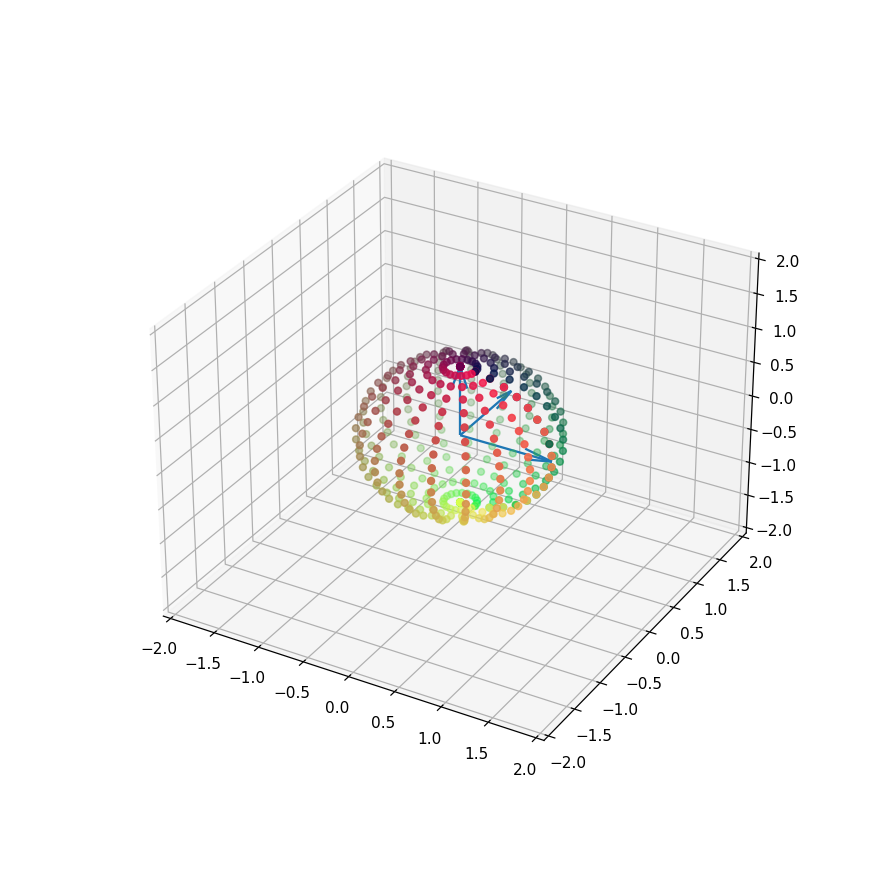

In [11]:
xArr = []
yArr = []
zArr = []
colorArr = []

for s, t in product(arr2, arr1):
    xArr.append(f1(s, t))
    yArr.append(f2(s, t))
    zArr.append(f3(s, t))
    colorArr.append([s / (2 * pi), t / (pi), 0.3])
    
plot = plt.figure(figsize=(8, 8))
ax = plot.add_subplot(111, projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

for unitV in unitVArr:
    ax.quiver(0, 0, 0, unitV[0], unitV[1], unitV[2])

ax.scatter(xArr, yArr, zArr, c=colorArr)

# 3.2

In [12]:
# macierz rozciągająca
D = np.array([[3, 0, 0], [0, 2, 0], [0, 0, 1]])

# macierz obrotu względem OX
RX = np.array([[1, 0, 0], [0, cos(pi / 4), -sin(pi / 4)], [0, sin(pi / 4), cos(pi / 4)]])

# macierz obrotu względem OZ
RZ = np.array([[cos(pi / 4), -sin(pi / 4), 0], [sin(pi / 4), cos(pi / 4), 0], [0, 0, 1]])

A1 = D
A2 = D @ RX
A3 = RZ @ D @ RX

# Rozciągnięcie:

<IPython.core.display.Javascript object>


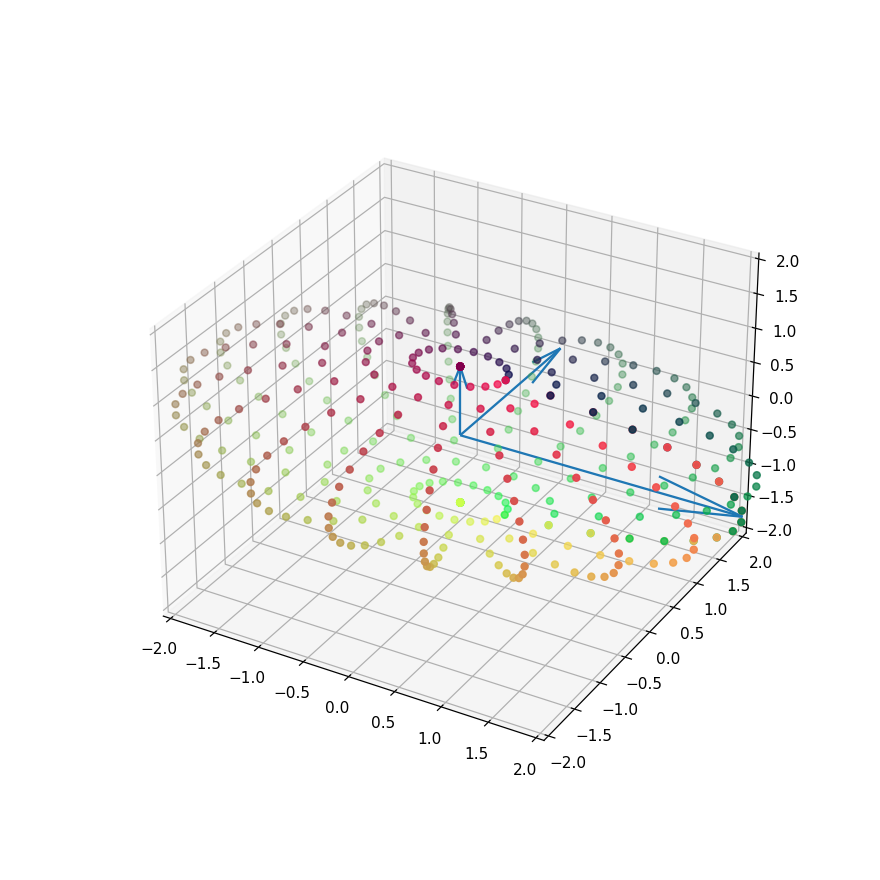

In [13]:
xArr = []
yArr = []
zArr = []
colorArr = []

for s, t in product(arr2, arr1):    
    
    tmpV = np.array([f1(s, t), f2(s, t), f3(s, t)]).T
    tmpV = A1 @ tmpV
    
    (x, y, z) = tmpV
    
    xArr.append(x)
    yArr.append(y)
    zArr.append(z)
    colorArr.append([s / (2 * pi), t / (pi), 0.3])
    
plot = plt.figure(figsize=(8, 8))
ax = plot.add_subplot(111, projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

for unitV in unitVArr:
    transformedV = A1 @ unitV
    ax.quiver(0, 0, 0, transformedV[0], transformedV[1], transformedV[2])

ax.scatter(xArr, yArr, zArr, c=colorArr)

# Rozciągnięcie + obrót względem OX

<IPython.core.display.Javascript object>


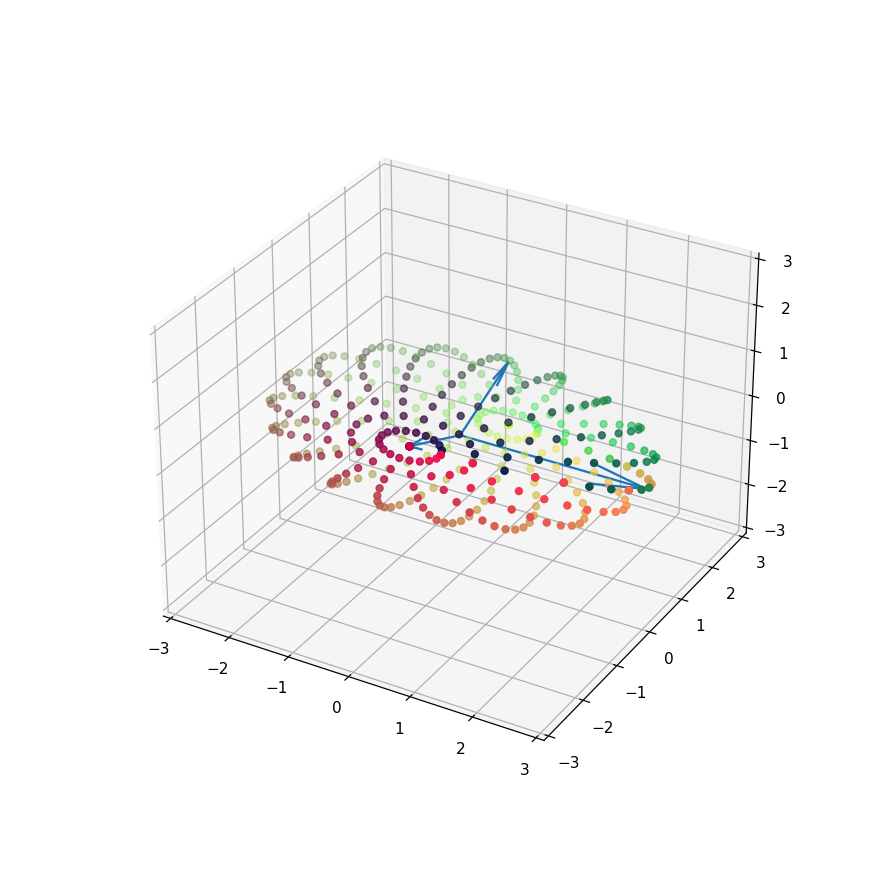

In [14]:
xArr = []
yArr = []
zArr = []
colorArr = []

for s, t in product(arr2, arr1):    
    
    tmpV = np.array([f1(s, t), f2(s, t), f3(s, t)]).T
    tmpV = A2 @ tmpV
    
    (x, y, z) = tmpV
    
    xArr.append(x)
    yArr.append(y)
    zArr.append(z)
    colorArr.append([s / (2 * pi), t / (pi), 0.3])
    
plot = plt.figure(figsize=(8, 8))
ax = plot.add_subplot(111, projection='3d')
ax.set_xlim3d(-3, 3)
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(-3, 3)

for unitV in unitVArr:    
    transformedV = A2 @ unitV
    ax.quiver(0, 0, 0, transformedV[0], transformedV[1], transformedV[2])

ax.scatter(xArr, yArr, zArr, c=colorArr)

# Rozciągnięcie + obrót względem OX + obrót względem OZ

<IPython.core.display.Javascript object>


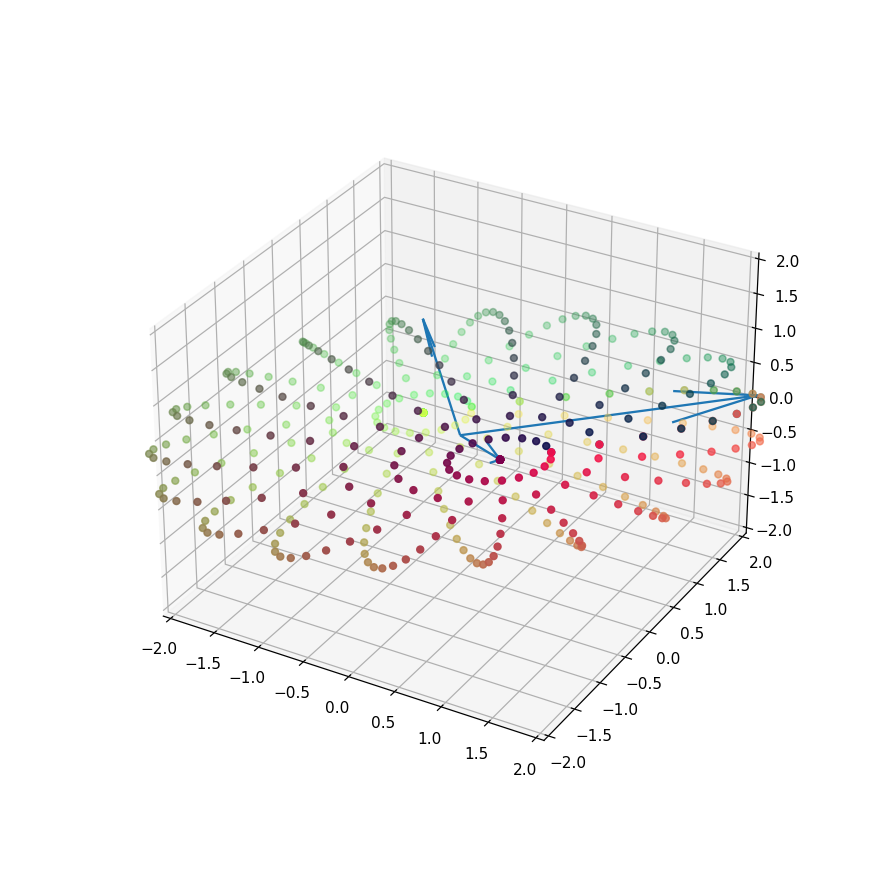

In [15]:
xArr = []
yArr = []
zArr = []
colorArr = []

for s, t in product(arr2, arr1):    
    
    tmpV = np.array([f1(s, t), f2(s, t), f3(s, t)]).T
    tmpV = A3 @ tmpV
    
    (x, y, z) = tmpV
    
    xArr.append(x)
    yArr.append(y)
    zArr.append(z)
    colorArr.append([s / (2 * pi), t / (pi), 0.3])
    
plot = plt.figure(figsize=(8, 8))
ax = plot.add_subplot(111, projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

for unitV in unitVArr:    
    transformedV = A3 @ unitV
    ax.quiver(0, 0, 0, transformedV[0], transformedV[1], transformedV[2])

ax.scatter(xArr, yArr, zArr, c=colorArr)

# 3.3

W poprzednim podpunkcie, na odpowiednich wykresach dodano półosie

In [16]:
u, s, vh = np.linalg.svd(A1)
        
print("Dekompozycja SVD dla A1:\n")    
print(u, "\n")
print(s, "\n")
print(vh, "\n\n")

A2 = np.matrix(A2, dtype='float')
u, s, vh = np.linalg.svd(A2)

print("Dekompozycja SVD dla A2:\n")    
print(u, "\n")
print(s, "\n")
print(vh, "\n\n")

A3 = np.matrix(A3, dtype='float')
u, s, vh = np.linalg.svd(A3)
        
print("Dekompozycja SVD dla A3:\n")
print(u, "\n")
print(s, "\n")
print(vh, "\n\n")

Dekompozycja SVD dla A1:

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[3. 2. 1.] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 


Dekompozycja SVD dla A2:

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00 -1.59784069e-17]
 [ 0.00000000e+00 -3.69291030e-17  1.00000000e+00]] 

[3. 2. 1.] 

[[ 1.          0.          0.        ]
 [-0.         -0.70710678  0.70710678]
 [ 0.          0.70710678  0.70710678]] 


Dekompozycja SVD dla A3:

[[-7.07106781e-01 -7.07106781e-01  1.57009246e-16]
 [-7.07106781e-01  7.07106781e-01 -1.57009246e-16]
 [ 0.00000000e+00  2.22044605e-16  1.00000000e+00]] 

[3. 2. 1.] 

[[-1.          0.          0.        ]
 [-0.          0.70710678 -0.70710678]
 [-0.          0.70710678  0.70710678]] 




# 3.4

<IPython.core.display.Javascript object>


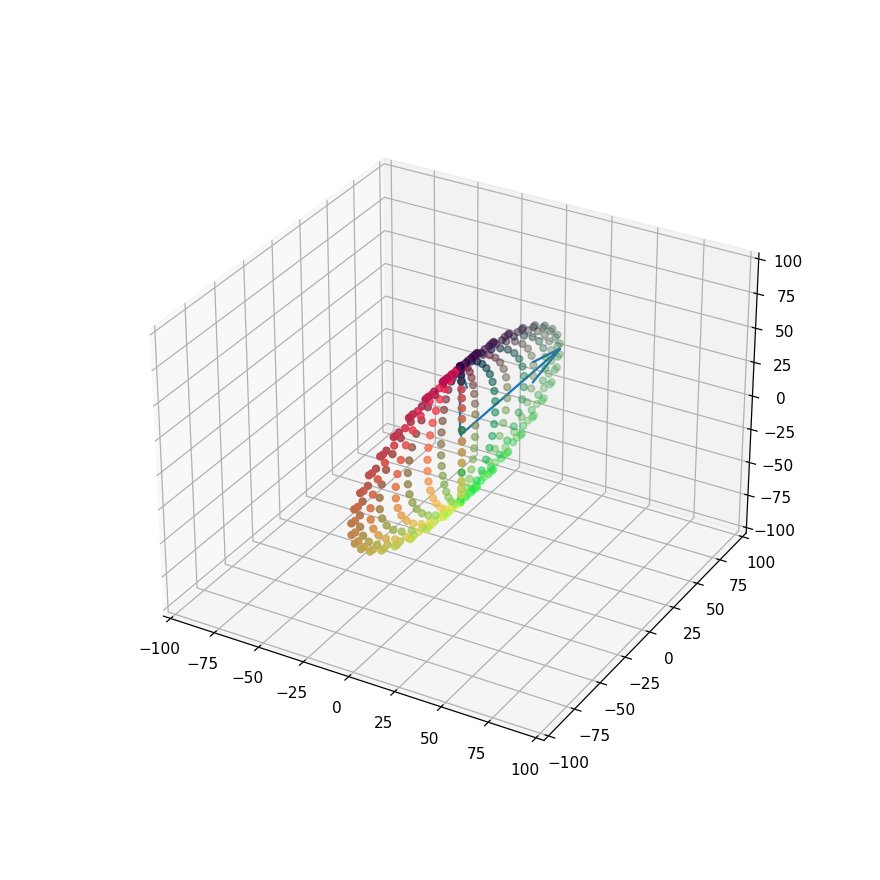

In [17]:
A4 = np.array([[1, 0, 0], [0, 100, 0], [0, 0, 50]])

xArr = []
yArr = []
zArr = []
colorArr = []

for s, t in product(arr2, arr1):    
    
    tmpV = np.array([f1(s, t), f2(s, t), f3(s, t)]).T
    tmpV = A4 @ tmpV
    
    (x, y, z) = tmpV
    
    xArr.append(x)
    yArr.append(y)
    zArr.append(z)
    colorArr.append([s / (2 * pi), t / (pi), 0.3])
    
plot = plt.figure(figsize=(8, 8))
ax = plot.add_subplot(111, projection='3d')
ax.set_xlim3d(-100, 100)
ax.set_ylim3d(-100, 100)
ax.set_zlim3d(-100, 100)

for unitV in unitVArr:
    transformedV = A4 @ unitV
    ax.quiver(0, 0, 0, transformedV[0], transformedV[1], transformedV[2])

ax.scatter(xArr, yArr, zArr, c=colorArr)

Wygenerowana elipsoida jest wydłużona szczególnie w jednym wymiarze w stosunku do kuli przed transformacją. Dzieje się tak dlatego, że wartości osobliwe macierzy przekształcenia odpowiadają skalowaniu poszczególnych wymiarów. W momencie kiedy jedna z wartości osobliwych macierzy jest 100 razy większa od innej, elipsa jest znacznie dłuższa w jednym wymiarze.

# 3.5
Dla tego podpunku biorę macierz A3 

In [18]:
A3 = np.matrix(A3, dtype='float')
u, s, vh = np.linalg.svd(A3)

S = np.zeros((len(s), len(s)))

for i in range(len(s)):
    S[i, i] = s[i]
    
u = np.matrix(u, dtype='float')
S = np.matrix(S, dtype='float')
vh = np.matrix(vh, dtype='float')
    
print(u)
print(S)
print(vh)

[[-7.07106781e-01 -7.07106781e-01  1.57009246e-16]
 [-7.07106781e-01  7.07106781e-01 -1.57009246e-16]
 [ 0.00000000e+00  2.22044605e-16  1.00000000e+00]]
[[3. 0. 0.]
 [0. 2. 0.]
 [0. 0. 1.]]
[[-1.          0.          0.        ]
 [-0.          0.70710678 -0.70710678]
 [-0.          0.70710678  0.70710678]]


# $$ S (V_i)^T $$

<IPython.core.display.Javascript object>


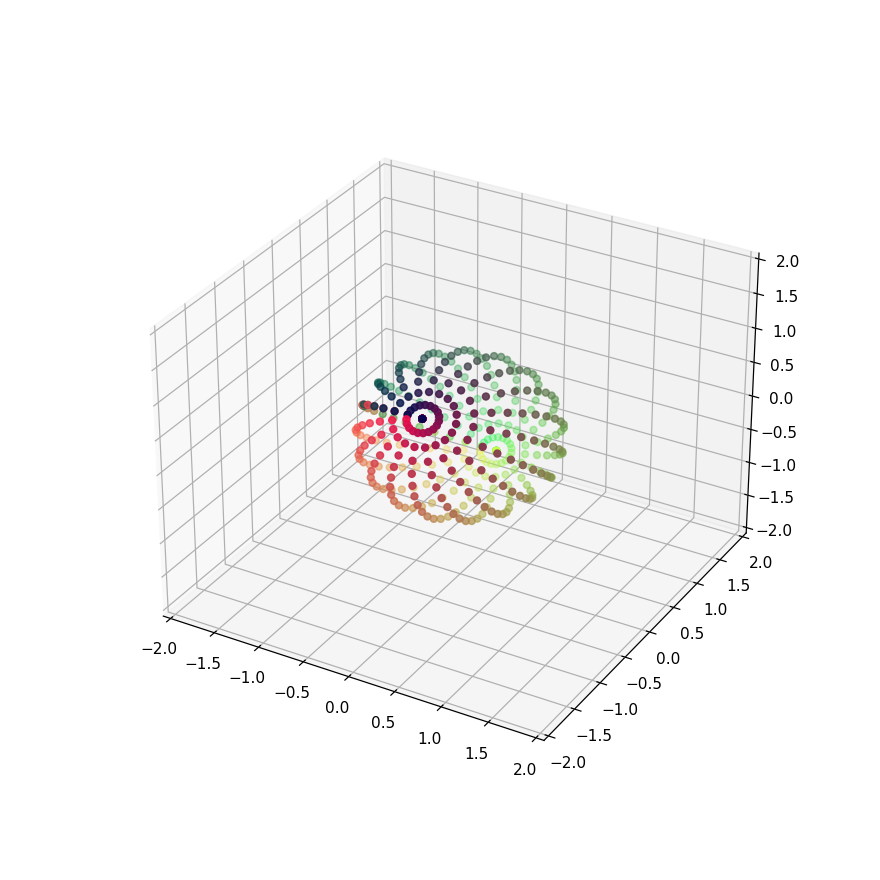

In [19]:
xArr = []
yArr = []
zArr = []
colorArr = []

for s, t in product(arr2, arr1):    
        
    tmpV = np.array([f1(s, t), f2(s, t), f3(s, t)])
    tmpV = vh @ tmpV
    
    x = tmpV[0, 0]
    y = tmpV[0, 1]
    z = tmpV[0, 2]
    
    xArr.append(x)
    yArr.append(y)
    zArr.append(z)
    colorArr.append([s / (2 * pi), t / (pi), 0.3])
    
plot = plt.figure(figsize=(8, 8))
ax = plot.add_subplot(111, projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

ax.scatter(xArr, yArr, zArr, c=colorArr)

# $$ S \Sigma_i (V_i)^T $$

W pierwszym kroku sfera obraca się względem osi OX

<IPython.core.display.Javascript object>


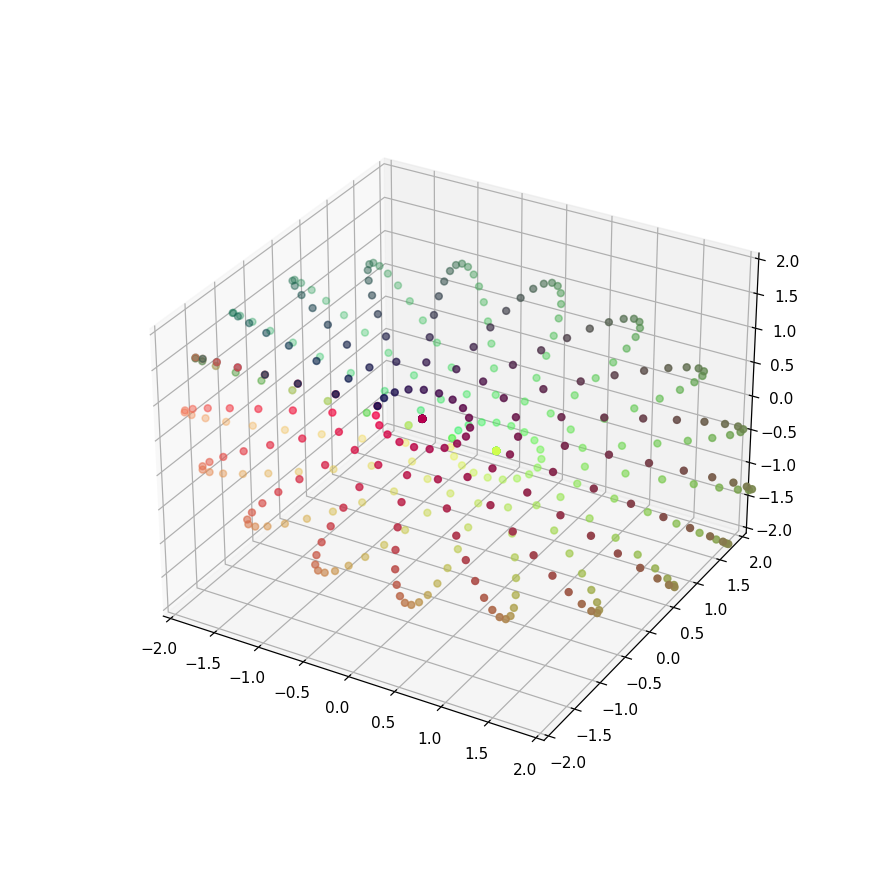

In [20]:
xArr = []
yArr = []
zArr = []
colorArr = []

for s, t in product(arr2, arr1):    
        
    tmpV = np.array([f1(s, t), f2(s, t), f3(s, t)])
    tmpV = vh @ S @ tmpV
    
    
    x = tmpV[0, 0]
    y = tmpV[0, 1]
    z = tmpV[0, 2]
    
    xArr.append(x)
    yArr.append(y)
    zArr.append(z)
    colorArr.append([s / (2 * pi), t / (pi), 0.3])
    
plot = plt.figure(figsize=(8, 8))
ax = plot.add_subplot(111, projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

ax.scatter(xArr, yArr, zArr, c=colorArr)

# $$ S U_i \Sigma_i (V_i)^T $$

W drugim kroku dochodzi rozciągnięcie macierzy

<IPython.core.display.Javascript object>


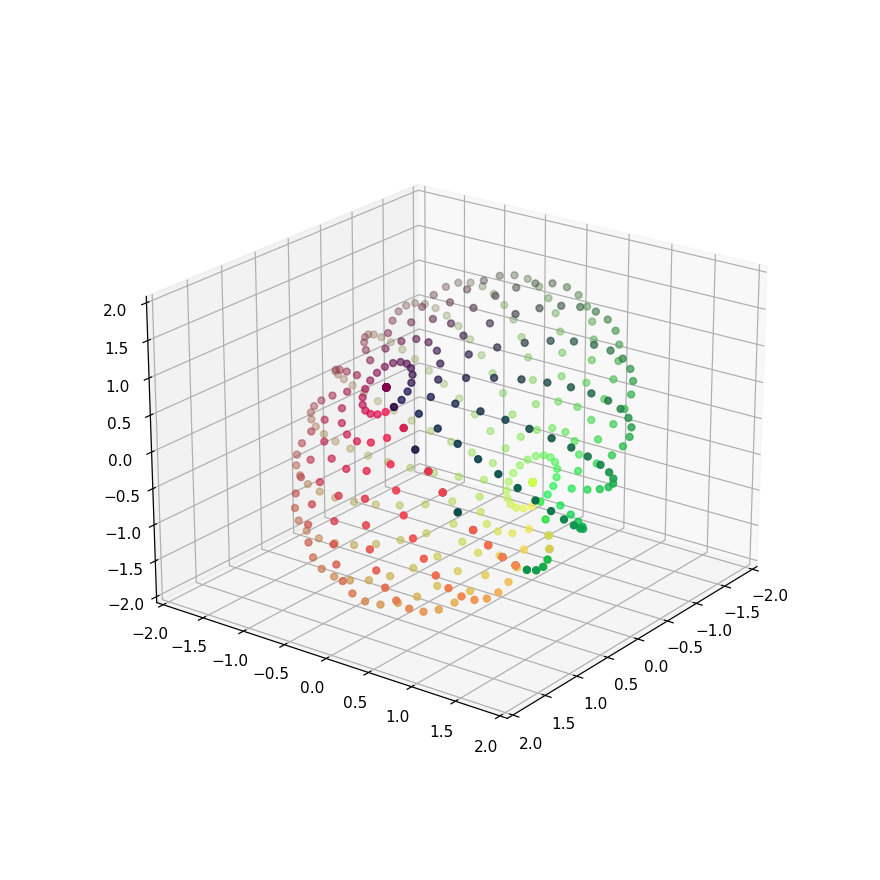

In [21]:
xArr = []
yArr = []
zArr = []
colorArr = []

for s, t in product(arr2, arr1):    
        
    tmpV = np.array([f1(s, t), f2(s, t), f3(s, t)])
    tmpV = u @ vh @ S @ tmpV
    
    
    x = tmpV[0, 0]
    y = tmpV[0, 1]
    z = tmpV[0, 2]
    
    xArr.append(x)
    yArr.append(y)
    zArr.append(z)
    colorArr.append([s / (2 * pi), t / (pi), 0.3])
    
plot = plt.figure(figsize=(8, 8))
ax = plot.add_subplot(111, projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

ax.scatter(xArr, yArr, zArr, c=colorArr)

W trzecim kroku zachodzi ponowne obrócenie elipsoidy - tym razem wzdłuż osi OZ.

# Zad 4

# 4.1, 4.2

In [46]:
matrix = np.array([[0.835, 0.667], [0.333, 0.266]])
vector = np.array([[0.168], [0.067]])

print("Rozwiazanie układu przed zmianą wartości:")
print(np.linalg.solve(matrix, vector))

print("-----------------------------------------")

matrix = np.array([[0.835, 0.667], [0.333, 0.266]])
vector = np.array([[0.168], [0.066]])

print("Rozwiazanie układu po zmianie wartości:")
print(np.linalg.solve(matrix, vector))

Rozwiazanie układu przed zmianą wartości:
[[ 1.]
 [-1.]]
-----------------------------------------
Rozwiazanie układu po zmianie wartości:
[[-665.99999998]
 [ 833.99999998]]


Jak widać, po niewielkim zaburzeniu wektora wyrazów wolnych, otrzymujemy całkiem różne rozwiązania. Dzieje się tak dlatego, że układ jest źle uwarunkowany, tzn. że wskaźnik uwarunkowania macierzy współczynników jest duży (niekorzystny). Wskaźnik uwarunkowania definiuje się jako stosunek błędu względnego wektora rozwiązania x do błędu względnego b. Ponieważ jednak nie znamy dokładnych wartości rozwiązania, nie jesteśmy w stanie obliczyc błędu względnego. Jeżeli jednak istnieje rozkład SVD danej macierzy, to współczynnik uwarunkowania spełnia:

$$\kappa = \frac{max |w_i|}{min |w_i|}$$

gdzie 'w' oznacza wartość osobliwą macierzy diagonalnej 'sigma' z rozkładu svd.

In [47]:
(_, s, _) = np.linalg.svd(matrix)
kappa = max(s) / min(s)

print("Macierz:")
print(matrix)
print("Współczynnik kappa uwarunkowania macierzy wynosi:", kappa, "\n")

print("Porównanie z losowymi macierzami o tych samych wymiarach:\n")

for i in range(3):
    matrix = np.random.rand(2, 2)
    print("Macierz:")
    print(matrix)
    
    (_, s, _) = np.linalg.svd(matrix)
    kappa = max(s) / min(s)    
    print("Współczynnik kappa uwarunkowania macierzy wynosi:", kappa, "\n")

Macierz:
[[0.835 0.667]
 [0.333 0.266]]
Współczynnik kappa uwarunkowania macierzy wynosi: 1323758.9999810576 

Porównanie z losowymi macierzami o tych samych wymiarach:

Macierz:
[[0.18441669 0.22579695]
 [0.27469084 0.94479376]]
Współczynnik kappa uwarunkowania macierzy wynosi: 9.277030906924821 

Macierz:
[[0.96813238 0.50311897]
 [0.63877743 0.9375705 ]]
Współczynnik kappa uwarunkowania macierzy wynosi: 3.973901768813927 

Macierz:
[[0.90101758 0.59114729]
 [0.79315468 0.49401982]]
Współczynnik kappa uwarunkowania macierzy wynosi: 85.64634466149049 



Na podstawie porównania macierzy danej w zadaniu oraz macierzy losowo wygenerowanych, można stwierdzić, że układ równań z zadania jest bardzo źle uwarunkowany. Jego współczynnik uwarunkowania wynosi 1323758.9999810576, natomiast współczynniki uwarunkowania macierzy losowo wygenerowanych wynoszą kolejno: 21.93847573328816, 3.0099568162763237, 9.800779744461185 
(wyniki orientacyjne, przy kolejnym uruchomieniu notatnika, wygenerują się inne losowe macierze i wyniki mogą się zmienić).